🤖 Understanding LLM Mechanisms - Simple Demo
Original text: 'The cat sat on the mat'
Tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat']
Number of tokens: 6

Vocabulary size: 16
Vocabulary: {'sat': 0, 'cat': 1, 'in': 2, 'the': 3, 'on': 4, 'ran': 5, 'is': 6, 'dog': 7, 'dogs': 8, 'park': 9, 'soft': 10, 'mat': 11, 'and': 12, 'cats': 13, 'are': 14, 'pets': 15}

'the cat sat' → [3, 1, 0]

Token 'cat' (ID: 1) embedding:
Vector: [ 0.6  -0.61  0.57 -0.12]

Sentence: 'the cat sat'
Token embeddings shape: (3, 4)

Attention weights for 'cat':
  the: 0.115
  cat: 0.516
  sat: 0.369

🤖 Simple LLM Text Generation:
Attempt 1: the cat the cat sat soft
Attempt 2: the cat sat are mat dog
Attempt 3: the cat and cat the park


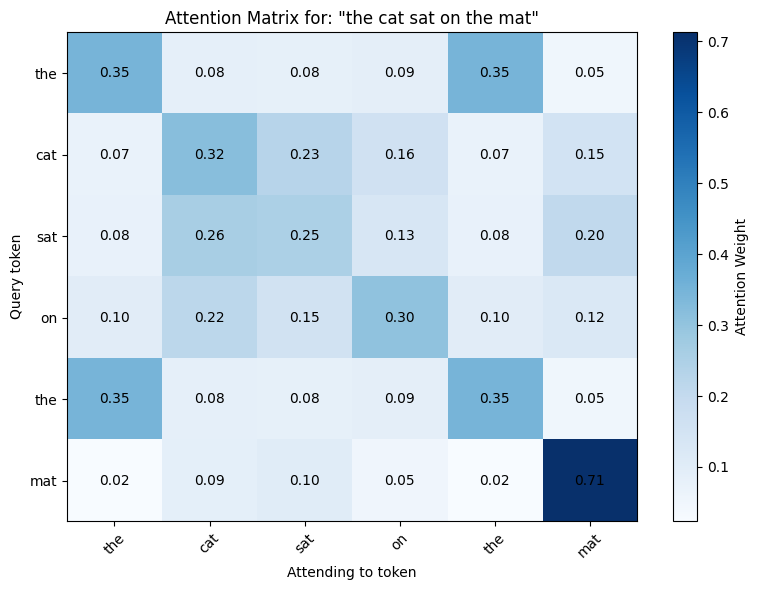


🎯 Key LLM Mechanisms Summary:
1. TOKENIZATION: Text → Tokens (words/subwords)
2. VOCABULARY: Tokens → Numbers
3. EMBEDDINGS: Numbers → Dense vectors
4. ATTENTION: Tokens learn to focus on relevant context
5. PREDICTION: Use context to predict next token
6. GENERATION: Repeat prediction to create new text

💡 Real LLMs use:
   - Billions of parameters
   - Transformer architecture
   - Multi-head attention
   - Deep neural networks
   - Massive training datasets

This demo shows the core concepts in a simplified way!


In [4]:
# Simple LLM Mechanisms Demo
# This notebook demonstrates the basic concepts behind Large Language Models

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

print("🤖 Understanding LLM Mechanisms - Simple Demo")
print("=" * 50)

# %% [markdown]
# ## 1. Tokenization - Breaking Text into Pieces
# LLMs first convert text into tokens (words or subwords)


def simple_tokenizer(text):
    """Simple word-based tokenizer"""
    return text.lower().split()


# Example
sample_text = "The cat sat on the mat"
tokens = simple_tokenizer(sample_text)
print(f"Original text: '{sample_text}'")
print(f"Tokens: {tokens}")
print(f"Number of tokens: {len(tokens)}")

# %% [markdown]
# ## 2. Vocabulary and Token-to-Number Conversion
# Each token gets mapped to a unique number


def create_vocabulary(texts):
    """Create vocabulary from list of texts"""
    all_tokens = []
    for text in texts:
        all_tokens.extend(simple_tokenizer(text))

    unique_tokens = list(set(all_tokens))
    vocab = {token: idx for idx, token in enumerate(unique_tokens)}
    return vocab, unique_tokens


# Sample training data
training_texts = [
    "the cat sat on the mat",
    "the dog ran in the park",
    "cats and dogs are pets",
    "the mat is soft",
]

vocab, vocab_list = create_vocabulary(training_texts)
print(f"\nVocabulary size: {len(vocab)}")
print(f"Vocabulary: {vocab}")


def text_to_numbers(text, vocab):
    """Convert text to list of numbers using vocabulary"""
    tokens = simple_tokenizer(text)
    return [vocab.get(token, -1) for token in tokens]  # -1 for unknown tokens


# Example conversion
example_numbers = text_to_numbers("the cat sat", vocab)
print(f"\n'the cat sat' → {example_numbers}")

# %% [markdown]
# ## 3. Simple Embeddings - Converting Numbers to Vectors
# Each token number becomes a vector of features


def create_simple_embeddings(vocab_size, embedding_dim=4):
    """Create random embeddings for demonstration"""
    # In real LLMs, these are learned during training
    return np.random.randn(vocab_size, embedding_dim) * 0.5


embedding_dim = 4
embeddings = create_simple_embeddings(len(vocab), embedding_dim)


def get_embedding(token_id, embeddings):
    """Get embedding vector for a token ID"""
    return embeddings[token_id]


# Example
cat_id = vocab["cat"]
cat_embedding = get_embedding(cat_id, embeddings)
print(f"\nToken 'cat' (ID: {cat_id}) embedding:")
print(f"Vector: {cat_embedding.round(2)}")

# %% [markdown]
# ## 4. Simple Attention Mechanism
# How tokens "pay attention" to each other


def simple_attention(query, keys, values):
    """
    Simplified attention mechanism
    query: what we're looking for
    keys: what we compare against
    values: what we actually use
    """
    # Calculate similarity scores (dot product)
    scores = np.dot(keys, query)

    # Convert to probabilities (softmax)
    exp_scores = np.exp(scores - np.max(scores))  # subtract max for stability
    attention_weights = exp_scores / np.sum(exp_scores)

    # Weighted combination of values
    output = np.dot(attention_weights, values)

    return output, attention_weights


# Example with 3 words: "the cat sat"
sentence = "the cat sat"
token_ids = text_to_numbers(sentence, vocab)
sentence_embeddings = np.array([get_embedding(tid, embeddings) for tid in token_ids])

print(f"\nSentence: '{sentence}'")
print(f"Token embeddings shape: {sentence_embeddings.shape}")

# Let's see what "cat" pays attention to
cat_query = sentence_embeddings[1]  # "cat" is at index 1
output, weights = simple_attention(cat_query, sentence_embeddings, sentence_embeddings)

print(f"\nAttention weights for 'cat':")
for i, (token, weight) in enumerate(zip(simple_tokenizer(sentence), weights)):
    print(f"  {token}: {weight:.3f}")

# %% [markdown]
# ## 5. Next Token Prediction - The Core of LLMs
# Predicting what comes next based on context


class SimpleLLM:
    def __init__(self, vocab, embeddings):
        self.vocab = vocab
        self.embeddings = embeddings
        self.vocab_size = len(vocab)
        self.embedding_dim = embeddings.shape[1]

        # Simple linear layer for prediction (randomly initialized)
        self.prediction_weights = (
            np.random.randn(self.embedding_dim, self.vocab_size) * 0.1
        )

    def predict_next_token(self, context_tokens):
        """Predict next token given context"""
        # Get embeddings for context
        context_embeddings = np.array(
            [self.embeddings[token_id] for token_id in context_tokens]
        )

        # Simple: just use the last token's embedding
        # (Real LLMs use much more sophisticated context processing)
        last_embedding = context_embeddings[-1]

        # Project to vocabulary size
        logits = np.dot(last_embedding, self.prediction_weights)

        # Convert to probabilities
        exp_logits = np.exp(logits - np.max(logits))
        probabilities = exp_logits / np.sum(exp_logits)

        return probabilities

    def generate_text(self, start_text, max_length=10):
        """Generate text by predicting next tokens"""
        current_tokens = text_to_numbers(start_text, self.vocab)
        result_tokens = current_tokens.copy()

        for _ in range(max_length):
            if len(result_tokens) == 0:
                break

            # Predict next token
            probs = self.predict_next_token(result_tokens)

            # Sample next token (you could also take the most likely)
            next_token_id = np.random.choice(len(probs), p=probs)
            result_tokens.append(next_token_id)

            # Stop if we hit an unknown token or repeat too much
            if len(result_tokens) > max_length:
                break

        # Convert back to text
        result_text = []
        for token_id in result_tokens:
            for word, idx in self.vocab.items():
                if idx == token_id:
                    result_text.append(word)
                    break

        return " ".join(result_text)


# Create and test our simple LLM
simple_llm = SimpleLLM(vocab, embeddings)

print(f"\n🤖 Simple LLM Text Generation:")
print("=" * 30)

start_phrase = "the cat"
for i in range(3):
    generated = simple_llm.generate_text(start_phrase, max_length=5)
    print(f"Attempt {i+1}: {generated}")

# %% [markdown]
# ## 6. Visualization: Attention Weights
# Let's visualize how attention works


def visualize_attention(sentence, vocab, embeddings):
    """Visualize attention weights between tokens"""
    tokens = simple_tokenizer(sentence)
    token_ids = text_to_numbers(sentence, vocab)
    sentence_embeddings = np.array(
        [get_embedding(tid, embeddings) for tid in token_ids]
    )

    n_tokens = len(tokens)
    attention_matrix = np.zeros((n_tokens, n_tokens))

    # Calculate attention for each token to every other token
    for i in range(n_tokens):
        query = sentence_embeddings[i]
        _, weights = simple_attention(query, sentence_embeddings, sentence_embeddings)
        attention_matrix[i] = weights

    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(attention_matrix, cmap="Blues", aspect="auto")
    plt.colorbar(label="Attention Weight")
    plt.title(f'Attention Matrix for: "{sentence}"')
    plt.xlabel("Attending to token")
    plt.ylabel("Query token")
    plt.xticks(range(n_tokens), tokens, rotation=45)
    plt.yticks(range(n_tokens), tokens)

    # Add values to cells
    for i in range(n_tokens):
        for j in range(n_tokens):
            plt.text(
                j,
                i,
                f"{attention_matrix[i,j]:.2f}",
                ha="center",
                va="center",
                fontsize=10,
            )

    plt.tight_layout()
    plt.show()


# Visualize attention for a sample sentence
sample_sentence = "the cat sat on the mat"
if len(text_to_numbers(sample_sentence, vocab)) == len(
    simple_tokenizer(sample_sentence)
):
    visualize_attention(sample_sentence, vocab, embeddings)
else:
    print("Skipping visualization - some tokens not in vocabulary")

# %% [markdown]
# ## 7. Key Takeaways
print("\n🎯 Key LLM Mechanisms Summary:")
print("=" * 35)
print("1. TOKENIZATION: Text → Tokens (words/subwords)")
print("2. VOCABULARY: Tokens → Numbers")
print("3. EMBEDDINGS: Numbers → Dense vectors")
print("4. ATTENTION: Tokens learn to focus on relevant context")
print("5. PREDICTION: Use context to predict next token")
print("6. GENERATION: Repeat prediction to create new text")
print("\n💡 Real LLMs use:")
print("   - Billions of parameters")
print("   - Transformer architecture")
print("   - Multi-head attention")
print("   - Deep neural networks")
print("   - Massive training datasets")
print("\nThis demo shows the core concepts in a simplified way!")